In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from random import choices # random sampling with replacement

In [2]:
## /tmp/global2/amovilli/soma/2_met1s/2_aln/merged-runs/libsizes.mapped-reads.tsv
### grep -v WT  libsizes.mapped-reads.tsv | awk  '{sum += $1}END{print sum}'
#### 4218210
### grep -v WT  libsizes.mapped-reads.tsv | awk  '{sum += $1}END{print sum/10}'
#### 421821

## /ebio/abt6_projects/met1_somatic_transpositions/data/3_somatic-events/r_mutations/SomaticInsertions_CURATED-list.no-comm.mod.24-06-14.tsv
### cut -f5   SomaticInsertions_CURATED-list.no-comm.mod.24-06-14.tsv  | sort | uniq -c | awk '{sum+=$1}END{print sum}'
#### 362

posreads=362
totreads=4218210
avgindreads=totreads//10

# List of ALL reads + reads explaining mobilization
L=[0]*(totreads-posreads) +[1]*posreads


occurrences=[]
for i in range(1000):
    occurrences.append(choices(L, k=avgindreads).count(1))

#normoccurrences=occurrences/avgindreads

In [4]:
normoccurrences=[ o/avgindreads for o in occurrences ]

avgindreads

421821

In [21]:

types=["Simulation"]*len(occurrences)

# insertionsIND=[15,18,12,9,39+1,48+28+3,47+22+1,38+1+1,21+2,46+4]

individuals=["01",
       "02",
       "03",
       "04",
       "05",
       "06",
       "07",
       "08",
       "09",
       "10"]

met1s=[ "met1_" + s  for s in individuals]


insertionsIND=[15,18,12,9,39,48,47,38,21,46]
libsizes=[311342,273544,310276,243113,594804,568394,357987,730899,434368,393483]
norminsertions=[int(i) / int(j) for i,j in zip(insertionsIND, libsizes)]


data = {
  "Types": len(insertionsIND)*["met1"]+types,
  "Occurrences": insertionsIND+occurrences
}
df = pd.DataFrame(data)

ndata = {
  "Types": len(norminsertions)*["met1"]+types,
  "Occurrences": norminsertions+normoccurrences
}
ndf = pd.DataFrame(ndata)

In [79]:
len(normoccurrences)

1000

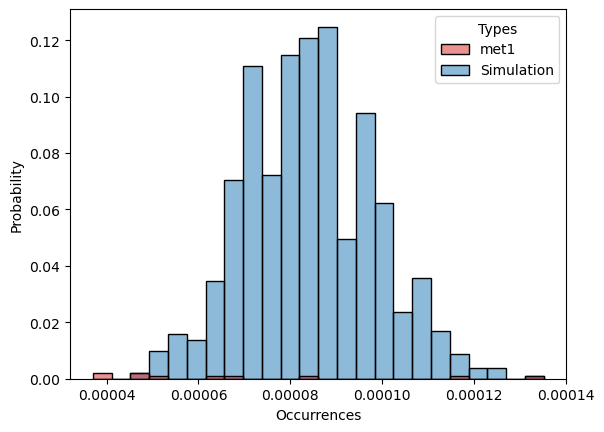

In [9]:
sns.histplot(data=ndf, x="Occurrences", hue="Types",
             #palette=sns.color_palette("Paired"),
             ec='k', palette=['tab:red', 'tab:blue'], stat="probability")

sns.set(style='white')
plt.show()

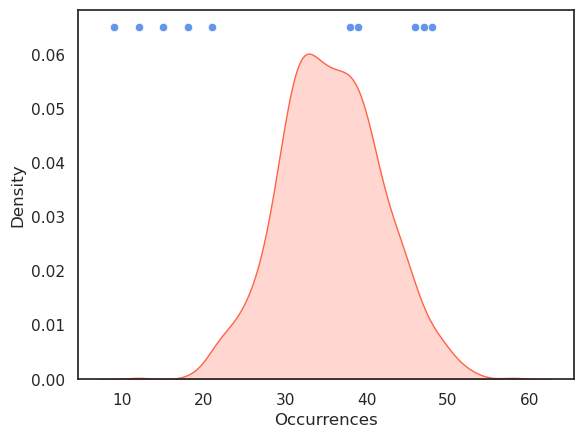

In [90]:
fig = plt.figure()


sns.scatterplot(data = {
  "Types": len(insertionsIND)*["met1"],
  "Occurrences": insertionsIND
}, x="Occurrences", y=0.065,  color='cornflowerblue')


sns.kdeplot(data= {
  "Types": types,
  "Occurrences": occurrences
}, x="Occurrences",  fill=True, color='tomato',
           )#stat='probability' , binwidth=5)



# show the plot
ax = plt.gca()

sns.set(style='white')
plt.show()



fig.savefig("/ebio/abt6_projects/met1_somatic_transpositions/data/Figures/pltout/prob-distr_insertions_3.pdf")


/tmp/ipykernel_38967/1483330393.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data = {


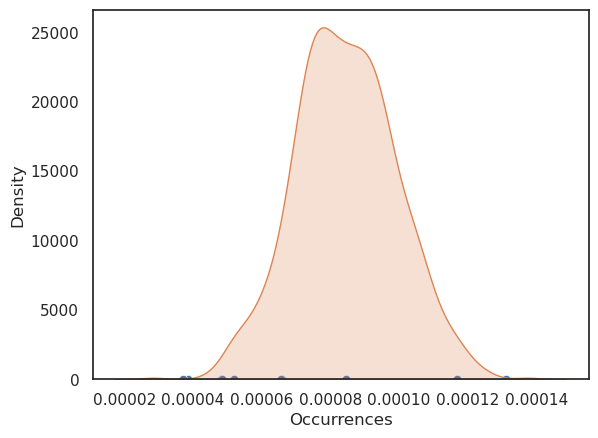

In [81]:
fig = plt.figure()


sns.scatterplot(data = {
  "Types": len(norminsertions)*["met1"],
  "Occurrences": norminsertions
}, x="Occurrences", y=0.065,  palette=['tab:blue', 'tab:orange'])


sns.kdeplot(data= {
  "Types": types,
  "Occurrences": normoccurrences
}, x="Occurrences",  fill=True,
           )#stat='probability' , binwidth=5)



# show the plot
ax = plt.gca()

sns.set(style='white')
plt.show()



# fig.savefig("/ebio/abt6_projects/met1_somatic_transpositions/data/Figures/pltout/prob-distr_insertions_4.pdf")
